# Plot maps in Python

In this notebook, I'll explore various ways to plot data points with `latitude` and `longitude` values on Maps using various libraries. I took the dataset from [Kaggle](https://www.kaggle.com/darshank2019/business). I then downloaded the zip file, extracted the dataset and saved it as `dataset.csv` inside the `data` folder.

## Get the dataset

Firstly, I'll import the general libraries that are needed including `numpy`, `pandas` and `matplotlib`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

I'll now import the dataset and use `head()` to see the various columns and their values.

In [2]:
dataset = pd.read_csv('data/dataset.csv')
dataset.head(5)

,address,name,stars,longitude,postal_code,business_id,latitude,review_count,categories,city,is_open,hours,attributes,state
0,b'2818 E Camino Acequia Drive',b'Arizona Biltmore Golf Club',3.0,-112.018481,b'85016',b'1SWheh84yJXfytovILXOAQ',33.522143,5,"b'Golf, Active Life'",b'Phoenix',0,NaN,{'GoodForKids': 'False'},b'AZ'
1,b'30 Eglinton Avenue W',b'Emerald Chinese Restaurant',2.5,-79.652289,b'L5R 3E7',b'QXAEGFB4oINsVuTFxEYKFQ',43.605499,128,"b'Specialty Food, Restaurants, Dim Sum, Import...",b'Mississauga',1,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...","{'RestaurantsReservations': 'True', 'GoodForMe...",b'ON'
2,"b'10110 Johnston Rd, Ste 15'",b'Musashi Japanese Restaurant',4.0,-80.859132,b'28210',b'gnKjwL_1w79qoiV3IC_xQQ',35.092564,170,"b'Sushi Bars, Restaurants, Japanese'",b'Charlotte',1,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",b'NC'
3,"b'15655 W Roosevelt St, Ste 237'",b'Farmers Insurance - Paul Lorenz',5.0,-112.395596,b'85338',b'xvX2CttrVhyG2z1dFg_0xw',33.455613,3,"b'Insurance, Financial Services'",b'Goodyear',1,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",NaN,b'AZ'
4,"b'4209 Stuart Andrew Blvd, Ste F'",b'Queen City Plumbing',4.0,-80.887223,b'28217',b'HhyxOkGAM07SRYtlQ4wMFQ',35.190012,4,"b'Plumbing, Shopping, Local Services, Home Ser...",b'Charlotte',1,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",b'NC'


The latitude and lognitude values can be directly extracted from the respective columns. I'll also extract the states from the dataset.

In [3]:
latitudes = dataset.loc[:, 'latitude']
longitudes = dataset.loc[:, 'longitude']
states = dataset['state']
unique_states = states.unique()
names = dataset['address']

I'll also need to know the minimum and maximum values for the latitudes and longitudes so that if the map is a world map, I can zoom to the area where the locations exist.

In [4]:
min_latitude = latitudes.min()
max_latitude = latitudes.max()
min_longitude = longitudes.min()
max_longitude = longitudes.max()

## Gmplot

Using `gmplot`, we can use Google Maps to plot the data and save the file as an HTML which we can then open in the browser. 

In [5]:
import gmplot 

gmap = gmplot.GoogleMapPlotter(35, -102, 5)

I begin by plotting the first 1,000 points from the dataset on the map.

In [6]:
gmap.scatter(latitudes[:1000], longitudes[:1000], 'red', size = 10)
gmap.draw('data/gmplot.html')

We can now open the html in the browser. As we can see, the points are plotted on the map but the whole map is covered with the text `For development purposes only`. However, if we want to remove that, we need to supply an API Key which we can get after registering for Google APIs access and adding billing information.

In [7]:
gmap.apikey = '<API-KEY>'
gmap.draw('data/gmplot.html')

The text is now gone and the darkended background is also removed. Next, let's try to plot all the points in the dataset.

In [8]:
gmap.scatter(latitudes, longitudes, 'blue', size = 10)
gmap.draw('data/gmplot.html')

Even though the `html` page was generated. Each time I tried to open it, it would load for a few seconds and then get unresponsive. The page is not able to handle so many points at the same time.

## Geopandas

It's an opensource library that lets us make geo plots. It extends the `pandas` datatypes further for its spacial use.

In [9]:
import geopandas as gpd
import descartes
from shapely.geometry import Point

It expects the latitude and longitude values as `Point` values. Using colors is the easiest for geopandas as you can simply pass a list of colors from matplotlib and it automatically assigns the colors to each point respectively.

I'll create a list of colors for each state and save it to `colors` variable.

In [10]:
data_points = [Point(xy) for xy in zip(longitudes, latitudes)]
colormap = cm.rainbow(np.linspace(0, 1, len(unique_states)))

colors = []
for i, state in enumerate(states):
    colors.append(colormap[np.where(unique_states == state)[0][0]])

Using `gpd.datasets.get_path('naturalearth_lowres')` we can generate the worldmap. I've set its background as `lightgrey` and lines as `black`. Using `GeoDataFrame`, we can plot the points. It requires the `crs` to be `{'init': 'epsg:4326'}`. Finally, I disabled the axis and plot the max and min values for the plot based on extreme latitude and longitude values we calculated earlier. I'll plot the first 1000 points.

(23.204642003000004, 56.2999426916)

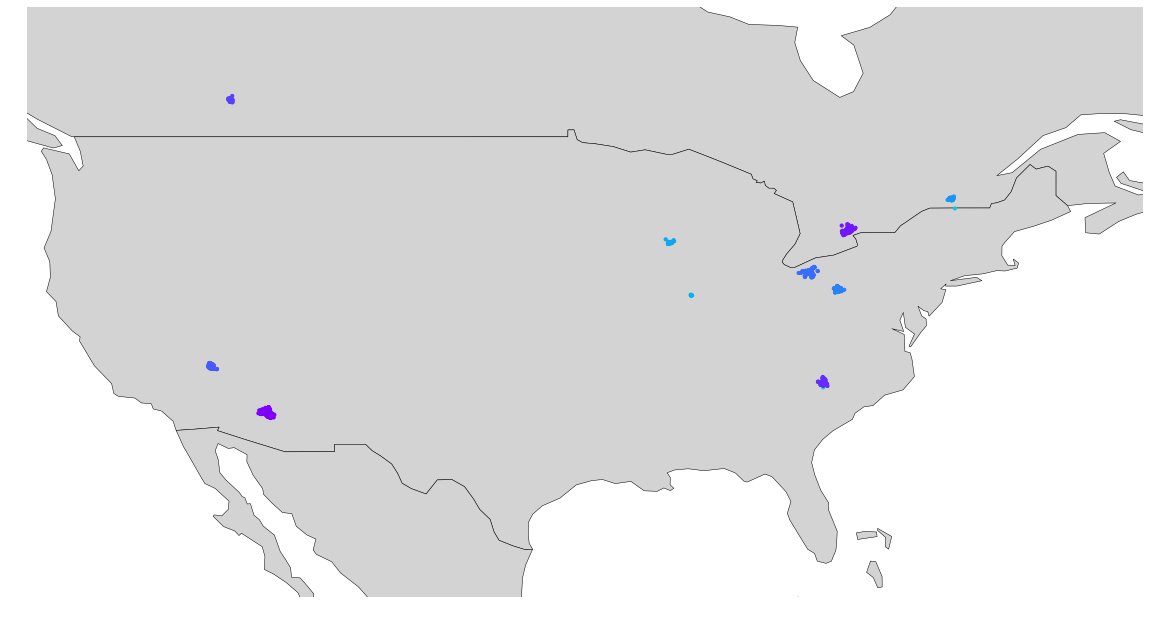

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color = 'lightgrey', linewidth = 0.5, edgecolor = 'black', figsize = (20, 12))

geo_df = gpd.GeoDataFrame(dataset.iloc[:1000,:], crs = {'init': 'epsg:4326'}, geometry = data_points[:1000])
geo_df.plot(markersize = 10, c = colors[:1000], ax = ax)

ax.axis('off')
ax.set_xlim(min_longitude - 10, max_longitude + 10)
ax.set_ylim(min_latitude - 10, max_latitude + 5)

Each location is plot on the map and the colors are grouped according to their `state` values. Next, let's plot all the points.

(23.204642003000004, 56.2999426916)

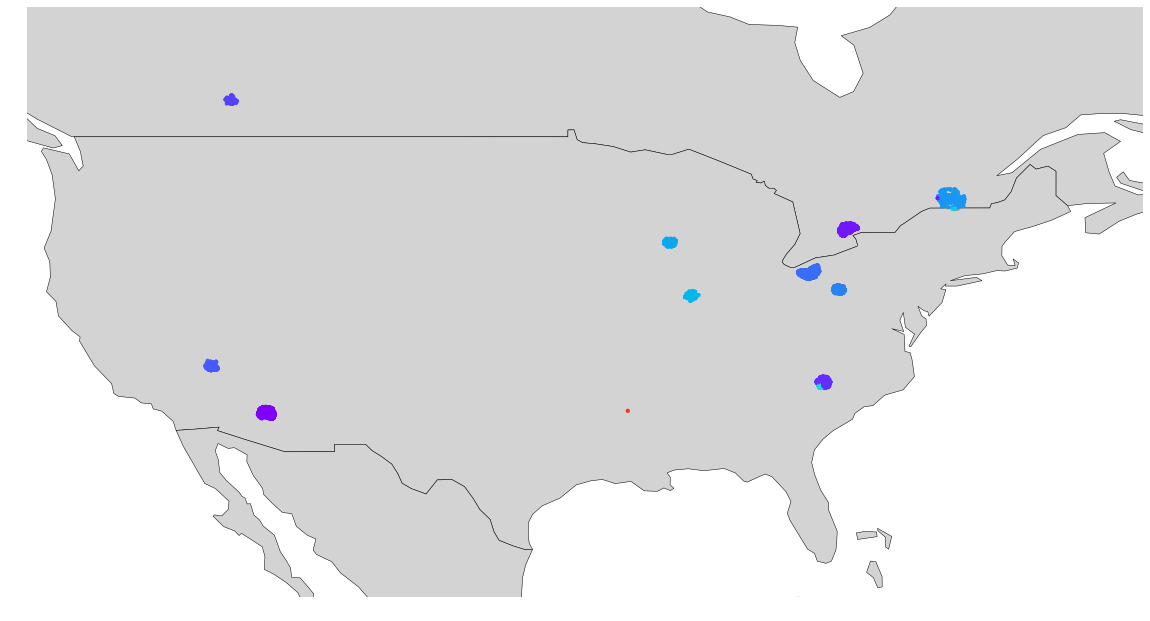

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color = 'lightgrey', linewidth = 0.5, edgecolor = 'black', figsize = (20, 12))

geo_df = gpd.GeoDataFrame(dataset, crs = {'init': 'epsg:4326'}, geometry = data_points)
geo_df.plot(markersize = 10, c = colors, ax = ax)

ax.axis('off')
ax.set_xlim(min_longitude - 10, max_longitude + 10)
ax.set_ylim(min_latitude - 10, max_latitude + 5)

The data points have increased incredibly. Some colors appear to be same but that is primarily due to how the list of colors was generated in the firsy place.

## Plotly

`plotly` is yet another library that plots highly interactive charts and lets the user interact with the charts as well. However, it requires username and an API Key to work properly. We will have to pass it in credentials to make it work.

In [13]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='<USERNAME>', api_key='<API-KEY>')

To plot the points, we can directly add the latitude and longitude values in the `Scattergeo` parameters `lat` and `long`. We also need to define the layout such as the colors, scope, title and more. Finally, the `Figure()` creates the object which we can plot. I'll first plot the first 1000 data points.

In [14]:
data = [ go.Scattergeo(
        locationmode = 'USA-states',
        lon = longitudes[:1000],
        lat = latitudes[:1000],
        text = names[:1000],
        mode = 'markers',
        marker = dict( 
            size = 10,
            opacity = 0.8
        ))]

layout = dict(
        title = 'Business locations', 
        geo = dict(
            scope='usa',
            projection=dict(type = 'albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='business')

/Users/k.bhanot/Personal/Important Work/Plot-Maps-in-Python/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Now, I'll try to plot all the points at once.

In [15]:
data = [ go.Scattergeo(
        locationmode = 'USA-states',
        lon = longitudes,
        lat = latitudes,
        text = names,
        mode = 'markers',
        marker = dict( 
            size = 10, 
            opacity = 0.8
        ))]

layout = dict(
        title = 'Business locations', 
        geo = dict(
            scope='usa',
            projection=dict(type='albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='business')

/Users/k.bhanot/Personal/Important Work/Plot-Maps-in-Python/lib/python3.7/site-packages/chart_studio/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



While I was able to plot all the points, the rendering is very slow and any interaction takes a lot of time to respond. Even the warning message suggests to use other methods to plot such graph.

## Bokeh

It is yet another library to plot beautiful visualizations. For maps, it uses Google maps and hence requires an API Key to work.

In [16]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

Once, the required libraries are loaded, using `gmap` I create the basic map centered around USA. I then plot all the points as circles on the map.To begin with I plot 1000 points.

In [17]:
output_file("data/bokeh.html")

map_options = GMapOptions(lat = 35, lng = -102, map_type = "roadmap", zoom = 4)
bokeh_plot = gmap("<API-KEY>", map_options, title = "Business locations")

source = ColumnDataSource(
    data = dict(lat = latitudes[:1000],
              lon = longitudes[:1000])
)
bokeh_plot.circle(x = "lon", y = "lat", size = 10, fill_alpha = 0.8, source = source)
show(bokeh_plot)

It opens up a new tab with the file with the map. Let's also try to plot all points.

In [18]:
output_file("data/bokeh.html")

map_options = GMapOptions(lat = 35, lng = -102, map_type = "roadmap", zoom = 4)
bokeh_plot = gmap("<API-KEY>", map_options, title = "Business locations")

source = ColumnDataSource(
    data = dict(lat = latitudes,
              lon = longitudes)
)
bokeh_plot.circle(x = "lon", y = "lat", size = 10, fill_alpha = 0.8, source = source)
show(bokeh_plot)

This is again based on Google Maps API and hence, again fails to load the complete set of data points.

# Results

From the plots above, I identified that all libraries are really useful for plotting the data points and my observations were as follows:
1. The most easiest way to get started is with gmplot. It requires very minimal code to start and is able to produce good results too.
2. Plotting points with different colors based on their state was easiest in GeoPandas. It was easy to plot all points but probably because the plot is not interactive.
3. The most visually interactive are Plotly plots. They were able to produce plots with all points but were less responsive then and suggested other means of plotting.
4. Bokeh was able to produce really nice Google Maps plot with very minimal code. However, it also failed at plotting all points.